In [1]:
import time

# Start timing the entire notebook
notebook_start_time = time.time()

In [2]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import resample

import warnings
warnings.filterwarnings("ignore")


In [3]:
pip install tqdm_joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install antropy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Alzheimer's EEG files (Filtered Derivatives)
alzheimer_files = [
    '/kaggle/input/alzheimerderivatives/sub-001_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-002_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-003_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-004_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-005_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-006_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-007_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-008_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-009_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-010_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-011_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-012_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-013_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-014_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-015_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-016_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-017_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-018_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-019_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-020_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-021_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-022_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-023_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-024_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-025_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-026_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-027_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-028_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-029_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-030_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-031_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-032_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-033_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-034_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-035_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-036_task-eyesclosed_eeg.set',

]

# Normal EEG files (Filtered Derivatives)
normal_files = [
    '/kaggle/input/alzheimerderivatives/sub-037_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-038_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-039_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-040_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-041_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-042_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-043_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-044_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-045_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-046_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-047_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-048_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-049_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-050_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-051_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-052_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-053_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-054_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-055_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-056_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-057_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-058_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-059_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-060_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-061_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-062_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-063_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-064_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-065_task-eyesclosed_eeg.set',
]

# Dementia EEG files (Filtered Derivatives)
dementia_files = [
    '/kaggle/input/alzheimerderivatives/sub-066_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-067_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-068_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-069_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-070_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-071_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-072_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-073_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-074_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-075_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-076_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-077_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-078_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-079_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-080_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-081_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-082_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-083_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-084_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-085_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-086_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-087_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-088_task-eyesclosed_eeg.set',
 ]
print("done")

done


In [6]:
import numpy as np
import mne

patients = np.concatenate([alzheimer_files, normal_files, dementia_files])

labels = np.concatenate([
    np.full(len(alzheimer_files), 'alzheimer'),
    np.full(len(normal_files), 'normal'),
    np.full(len(dementia_files), 'dementia')
])

In [7]:
print(f"Total number of patients: {len(patients)}")
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Print number of occurrences for each label
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")

Total number of patients: 69
alzheimer: 23
dementia: 23
normal: 23


In [8]:
import numpy as np
import mne
import os

# Load recordings
recordings, durations = [], []
for file_path in patients:
    eeg_data = mne.io.read_raw_eeglab(file_path, preload=True)
    recordings.append(eeg_data)
    durations.append(eeg_data.times[-1])

# Crop recordings to the shortest duration
min_duration = min(durations)
cropped_recordings = [eeg.copy().crop(tmin=0, tmax=min_duration) for eeg in recordings]

# Preprocess EEG data with band-specific filtering
def preprocess_eeg(raw, channels, l_freq, h_freq):
    raw.set_eeg_reference('average', projection=False)
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)
    return raw.pick_channels(channels)

# Define frequency bands
frequency_bands = {
    'delta': (0.5, 4),
    # 'theta': (4, 8),
    # 'alpha': (8, 13),
    # 'beta': (13, 30),
    # 'gamma': (30, 45)
}

# Select EEG channels
selected_channels=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

# Directory to save band-specific data
output_dir = "eeg_segments"
os.makedirs(output_dir, exist_ok=True)

# Process bands sequentially and save data to disk
time_duration = 5  # in seconds

for band_name, (l_freq, h_freq) in frequency_bands.items():
    print(f"Processing band: {band_name}")
    
    band_data = []
    band_labels = []
    
    for raw, label in zip(cropped_recordings, labels):
        # Preprocess the data for the current band
        processed_raw = preprocess_eeg(raw.copy(), selected_channels, l_freq, h_freq)
        
        # Segment the data
        sfreq = processed_raw.info['sfreq']
        segment_samples = int(time_duration * sfreq)
        total_samples = processed_raw.n_times
        
        for start in range(0, total_samples, segment_samples):
            end = start + segment_samples
            if end > total_samples:
                break
            segment = processed_raw.copy().crop(tmin=start / sfreq, tmax=(end - 1) / sfreq)
            band_data.append(segment.get_data())
            band_labels.append(label)
    
    # Save band data and labels as separate files
    np.save(os.path.join(output_dir, f"band_data.npy"), band_data)
    np.save(os.path.join(output_dir, f"band_labels.npy"), band_labels)
    
    print(f"Saved {band_name} data and labels to {output_dir}")


Processing band: delta
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selec

In [9]:
import numpy as np

# Load Delta Band
alpha_data = np.load("eeg_segments/band_data.npy", allow_pickle=True)
alpha_labels = np.load("eeg_segments/band_labels.npy", allow_pickle=True)
print(f"alpha_data Shape: {len(alpha_data)} segments")
print(f"alpha_labels Shape: {len(alpha_labels)} labels")

alpha_data Shape: 6555 segments
alpha_labels Shape: 6555 labels


In [10]:
alpha_data.shape

(6555, 19, 2500)

In [11]:
# import numpy as np
# import pandas as pd
# from scipy.stats import kurtosis, skew
# from scipy.signal import welch
# from joblib import Parallel, delayed

# def extract_features(channel_data, sampling_rate):
#     """
#     Extract time-domain and frequency-domain features for a single channel.
#     """
#     mean = np.mean(channel_data)
#     variance = np.var(channel_data)
#     std_dev = np.std(channel_data)
#     rms = np.sqrt(np.mean(channel_data**2))
#     skewness = skew(channel_data)
#     kurt = kurtosis(channel_data)

#     _, power_spectrum = welch(channel_data, fs=sampling_rate, nperseg=len(channel_data))
#     avg_power = np.mean(power_spectrum)

#     return [
#         mean, variance, std_dev, rms, skewness, kurt, avg_power
#     ]

# def extract_features_parallel(data, sampling_rate=500, n_jobs=-1):

#     def process_segment(segment):
#         return np.hstack([
#             extract_features(segment[channel], sampling_rate) for channel in range(segment.shape[0])
#         ])

#     features = Parallel(n_jobs=n_jobs)(
#         delayed(process_segment)(data[segment]) for segment in range(data.shape[0])
#     )

#     column_names = [
#         f"Ch_{channel}_{feature}"
#         for channel in range(data.shape[1])
#         for feature in ["Mean", "Variance", "StdDev", "RMS", "Skewness", "Kurtosis", "AvgPower"]
#     ]

#     return pd.DataFrame(features, columns=column_names)

# # Example usage
# sampling_rate = 500
# linear_features_df = extract_features_parallel(alpha_data, sampling_rate=sampling_rate)

# # Save to CSV
# linear_features_df.to_csv("linear_features.csv", index=False)
# linear_features_df.head()


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
from scipy.signal import welch
from joblib import Parallel, delayed
from antropy import petrosian_fd, lziv_complexity, app_entropy, sample_entropy,hjorth_params
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

def extract_features(channel_data, sampling_rate):
    """
    Extract time-domain, frequency-domain, Hjorth, and complexity measures for a single EEG channel.
    """
    # Time-domain features
    mean = np.mean(channel_data)
    variance = np.var(channel_data)
    std_dev = np.std(channel_data)
    rms = np.sqrt(np.mean(channel_data**2))
    skewness = skew(channel_data)
    kurt = kurtosis(channel_data)

    # Hjorth Parameters (Now using antropy)
    mobility, complexity = hjorth_params(channel_data)

    # Frequency-domain feature (Power Spectral Density)
    _, power_spectrum = welch(channel_data, fs=sampling_rate, nperseg=min(len(channel_data), 256))
    avg_power = np.mean(power_spectrum)

    # Complexity Measures
    pfd = petrosian_fd(channel_data)
    lzc = lziv_complexity(channel_data, normalize=True)
    apen = app_entropy(channel_data, order=2, metric="chebyshev")  # Approximate Entropy
    sampen = sample_entropy(channel_data)

    return [
        mean, variance, std_dev, rms, skewness, kurt,
        mobility, complexity, avg_power,
        pfd, lzc, apen, sampen
    ]

def extract_features_parallel(data, sampling_rate=500, n_jobs=-1):
    """
    Extract features for all EEG channels in parallel with progress updates.
    """
    def process_segment(segment_idx):
        segment = data[segment_idx]
        result = np.hstack([
            extract_features(segment[channel], sampling_rate) for channel in range(segment.shape[0])
        ])
        print(f"✅ Processed segment {segment_idx + 1}/{data.shape[0]}")  # Update after each segment
        return result

    # Use tqdm to track progress
    features = Parallel(n_jobs=n_jobs)(
        delayed(process_segment)(segment_idx) for segment_idx in tqdm(range(data.shape[0]), desc="Processing EEG Data")
    )

    column_names = [
        f"Ch_{channel}_{feature}"
        for channel in range(data.shape[1])
        for feature in ["Mean", "Variance", "StdDev", "RMS", "Skewness", "Kurtosis",
                        "Hjorth_Mobility", "Hjorth_Complexity", "AvgPower",
                        "PetrosianFD", "LZC", "ApEn", "SampEn"]
    ]

    return pd.DataFrame(features, columns=column_names)

# Example Usage:
sampling_rate = 500
linear_features_df = extract_features_parallel(alpha_data, sampling_rate=sampling_rate)

# Save to CSV
linear_features_df.to_csv("eeg_features.csv", index=False)
print("\n✅ Feature extraction completed. Saved to eeg_features.csv")


Processing EEG Data: 100%|██████████| 6555/6555 [34:13<00:00,  3.19it/s]



✅ Feature extraction completed. Saved to eeg_features.csv


In [13]:
# import numpy as np
# import pandas as pd
# from scipy.stats import kurtosis, skew
# from scipy.signal import welch
# from joblib import Parallel, delayed

# def extract_features(channel_data, sampling_rate):
#     """
#     Extract time-domain, frequency-domain, and Hjorth parameters for a single channel.
#     """
#     mean = np.mean(channel_data)
#     variance = np.var(channel_data)
#     std_dev = np.std(channel_data)
#     rms = np.sqrt(np.mean(channel_data**2))
#     skewness = skew(channel_data)
#     kurt = kurtosis(channel_data)

#     diff1 = np.diff(channel_data)
#     diff2 = np.diff(diff1)
#     activity = variance
#     mobility = np.sqrt(np.var(diff1) / activity)
#     complexity = np.sqrt(np.var(diff2) / np.var(diff1)) / mobility

#     _, power_spectrum = welch(channel_data, fs=sampling_rate, nperseg=len(channel_data))
#     avg_power = np.mean(power_spectrum)

#     return [
#         mean, variance, std_dev, rms, skewness, kurt,
#         mobility, complexity, avg_power
#     ]

# def extract_features_parallel(data, sampling_rate=500, n_jobs=-1):
  
#     def process_segment(segment):
#         return np.hstack([
#             extract_features(segment[channel], sampling_rate) for channel in range(segment.shape[0])
#         ])

#     features = Parallel(n_jobs=n_jobs)(
#         delayed(process_segment)(data[segment]) for segment in range(data.shape[0])
#     )

#     column_names = [
#         f"Ch_{channel}_{feature}"
#         for channel in range(data.shape[1])
#         for feature in ["Mean", "Variance", "StdDev", "RMS", "Skewness", "Kurtosis",
#                         "Hjorth_Mobility", "Hjorth_Complexity", "AvgPower"]
#     ]

#     return pd.DataFrame(features, columns=column_names)

# # Example usage
# sampling_rate = 500
# linear_features_df = extract_features_parallel(alpha_data, sampling_rate=sampling_rate)

# # Save to CSV
# linear_features_df.to_csv("linear_features.csv", index=False)
# linear_features_df.head()

In [14]:
# Add labels for each patient
linear_features_df['label'] = alpha_labels

In [15]:
linear_features_df

,Ch_0_Mean,Ch_0_Variance,Ch_0_StdDev,Ch_0_RMS,Ch_0_Skewness,Ch_0_Kurtosis,Ch_0_Hjorth_Mobility,Ch_0_Hjorth_Complexity,Ch_0_AvgPower,Ch_0_PetrosianFD,...,Ch_18_Skewness,Ch_18_Kurtosis,Ch_18_Hjorth_Mobility,Ch_18_Hjorth_Complexity,Ch_18_AvgPower,Ch_18_PetrosianFD,Ch_18_LZC,Ch_18_ApEn,Ch_18_SampEn,label
0,2.580748e-06,6.475513e-11,0.000008,0.000008,1.198410,1.119768,0.021075,2.022558,6.999634e-14,1.000755,...,0.083789,-0.254645,0.036969,1.288745,2.897858e-14,1.000796,0.00903,0.125919,0.124523,alzheimer
1,-3.243657e-07,2.492449e-11,0.000005,0.000005,-0.482709,0.022082,0.028343,1.687524,5.600373e-14,1.000735,...,-0.256190,0.551478,0.034587,1.410578,4.126926e-14,1.000755,0.00903,0.111429,0.091615,alzheimer
2,3.682696e-08,2.636230e-11,0.000005,0.000005,-0.119809,-0.420931,0.027803,1.666805,6.202097e-14,1.000714,...,0.182724,-0.555251,0.031966,1.460751,4.760265e-14,1.000775,0.00903,0.104821,0.100900,alzheimer
3,1.503626e-08,3.889421e-11,0.000006,0.000006,0.101403,-0.239865,0.029838,1.619129,8.972084e-14,1.000775,...,-0.011923,0.863594,0.034988,1.343056,6.652613e-14,1.000714,0.00903,0.115447,0.097289,alzheimer
4,2.291752e-07,1.850314e-10,0.000014,0.000014,0.283838,0.783849,0.026371,1.638704,4.553027e-13,1.000612,...,0.994829,6.082181,0.040775,1.230766,1.101006e-13,1.000755,0.00903,0.119314,0.082226,alzheimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,-3.123693e-07,3.758962e-11,0.000006,0.000006,-0.766429,1.639010,0.016011,2.502455,3.614518e-14,1.000735,...,-1.109329,3.959861,0.018226,1.831170,6.224821e-14,1.000694,0.00903,0.049516,0.041272,dementia
6551,2.348023e-07,5.644447e-12,0.000002,0.000002,0.289548,0.233006,0.032833,1.458656,1.596212e-14,1.000836,...,0.231298,0.265809,0.028809,1.598323,1.471571e-14,1.000755,0.00903,0.091634,0.087300,dementia
6552,2.956240e-07,7.710645e-12,0.000003,0.000003,0.035610,-0.591729,0.030686,1.433311,2.334134e-14,1.000755,...,-0.008879,-0.826197,0.031131,1.438052,2.094426e-14,1.000755,0.00903,0.102470,0.100256,dementia
6553,-2.691462e-07,1.041685e-11,0.000003,0.000003,0.166718,0.135010,0.026683,1.714406,2.013438e-14,1.000714,...,0.001123,-0.419786,0.024290,1.758899,1.941808e-14,1.000633,0.00903,0.074936,0.067954,dementia


In [16]:
linear_features_df.label.value_counts()

label
alzheimer    2185
normal       2185
dementia     2185
Name: count, dtype: int64

In [17]:
df = linear_features_df.copy()

# Assuming your DataFrame is named df and has a column 'label'
label_mapping = {'alzheimer': 1, 'normal': 0, 'dementia': 2}

# Map the labels to integers
df['label'] = df['label'].map(label_mapping)

In [41]:
df.head()

,Ch_0_Mean,Ch_0_Variance,Ch_0_StdDev,Ch_0_RMS,Ch_0_Skewness,Ch_0_Kurtosis,Ch_0_Hjorth_Mobility,Ch_0_Hjorth_Complexity,Ch_0_AvgPower,Ch_0_PetrosianFD,...,Ch_18_Skewness,Ch_18_Kurtosis,Ch_18_Hjorth_Mobility,Ch_18_Hjorth_Complexity,Ch_18_AvgPower,Ch_18_PetrosianFD,Ch_18_LZC,Ch_18_ApEn,Ch_18_SampEn,label
0,2.580748e-06,6.475513e-11,0.000008,0.000008,1.198410,1.119768,0.021075,2.022558,6.999634e-14,1.000755,...,0.083789,-0.254645,0.036969,1.288745,2.897858e-14,1.000796,0.00903,0.125919,0.124523,1
1,-3.243657e-07,2.492449e-11,0.000005,0.000005,-0.482709,0.022082,0.028343,1.687524,5.600373e-14,1.000735,...,-0.256190,0.551478,0.034587,1.410578,4.126926e-14,1.000755,0.00903,0.111429,0.091615,1
2,3.682696e-08,2.636230e-11,0.000005,0.000005,-0.119809,-0.420931,0.027803,1.666805,6.202097e-14,1.000714,...,0.182724,-0.555251,0.031966,1.460751,4.760265e-14,1.000775,0.00903,0.104821,0.100900,1
3,1.503626e-08,3.889421e-11,0.000006,0.000006,0.101403,-0.239865,0.029838,1.619129,8.972084e-14,1.000775,...,-0.011923,0.863594,0.034988,1.343056,6.652613e-14,1.000714,0.00903,0.115447,0.097289,1
4,2.291752e-07,1.850314e-10,0.000014,0.000014,0.283838,0.783849,0.026371,1.638704,4.553027e-13,1.000612,...,0.994829,6.082181,0.040775,1.230766,1.101006e-13,1.000755,0.00903,0.119314,0.082226,1


In [58]:
df_features= df.drop(columns = ['label'])
df_label = df['label']


X= df_features
y = df_label

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
MinMaxScaler_df = scaler1.fit_transform( X )       
MinMaxScaler_df

array([[ 3.33533302, -0.0545078 ,  0.27973602, ...,  0.        ,
         2.57864707,  2.90781298],
       [-0.4157723 , -0.17492458, -0.17761366, ...,  0.        ,
         1.92008613,  1.34084902],
       [ 0.05060242, -0.17057775, -0.15635581, ...,  0.        ,
         1.61976452,  1.78297565],
       ...,
       [ 0.38476308, -0.22696581, -0.50934839, ...,  0.        ,
         1.5129414 ,  1.75230616],
       [-0.34447249, -0.21878436, -0.44186626, ...,  0.        ,
         0.26155604,  0.21421577],
       [ 0.40993118, -0.20642779, -0.35489048, ...,  0.        ,
         1.76585701,  1.88650113]])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler_df, y, test_size=0.3, random_state = 42)

print(" Train data shape X :", X_train.shape)
print(" Train data shape y:", y_train.shape)

print(" Test data shape X :", X_test.shape)
print(" Test data shape y :", y_test.shape)

 Train data shape X : (4588, 247)
 Train data shape y: (4588,)
 Test data shape X : (1967, 247)
 Test data shape y : (1967,)


In [21]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Hyperparameter

In [22]:
# Start timing the cell you want to exclude
exclude_start_time = time.time()

In [23]:
# Initializing classifiers with default parameters
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'SVM': {'C': np.logspace(-1, 1, 3), 'kernel': ['linear', 'rbf'], 'gamma': ['scale']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
    'KNN': {'n_neighbors': np.arange(1, 11)},
    'Decision Tree': {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'Logistic Regression': {'C': np.logspace(-2, 2, 5), 'solver': ['newton-cg', 'lbfgs', 'liblinear']},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [ 0.01, 0.1, 1]},
    # 'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [ 0.01, 0.1, 0.5, 1], 'max_depth': np.arange(1, 11)}
    # 'Naive Bayes': {},
}

# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}
for classifier_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_classifiers[classifier_name] = grid_search.best_estimator_
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")

SVM: Best parameters - {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}, Best score - 0.765470429053725
Random Forest: Best parameters - {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}, Best score - 0.8332577814840949
KNN: Best parameters - {'n_neighbors': 7}, Best score - 0.665648379792969
Decision Tree: Best parameters - {'criterion': 'gini', 'max_depth': 8}, Best score - 0.6619427754138126
Logistic Regression: Best parameters - {'C': 100.0, 'solver': 'newton-cg'}, Best score - 0.6743615512362705
AdaBoost: Best parameters - {'learning_rate': 1, 'n_estimators': 200}, Best score - 0.6702252062826828


In [24]:
# End timing for the excluded cell
exclude_end_time = time.time()

In [25]:
# Compute the excluded cell's execution time
excluded_time = exclude_end_time - exclude_start_time
print(f"Excluded cell execution time: {excluded_time:.2f} seconds")

Excluded cell execution time: 997.85 seconds


# Model Training

In [26]:
# --- remaining cells that should be counted ---
remaining_start_time = time.time()

              precision  recall  f1-score    support
0                 80.93   92.72     86.42   65900.00
1                 90.02   79.44     84.40   68100.00
2                 83.63   81.50     82.55   62700.00
accuracy          84.54   84.54     84.54      84.54
macro avg         84.86   84.55     84.46  196700.00
weighted avg      84.94   84.54     84.49  196700.00
Train Accuracy: 100.0
Test Accuracy: 84.54
Confusion Matrix:
[[611  17  31]
 [ 71 541  69]
 [ 73  43 511]]


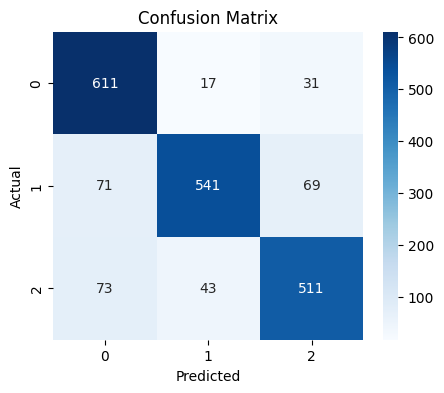

Multiclass AUC Score: 0.9571


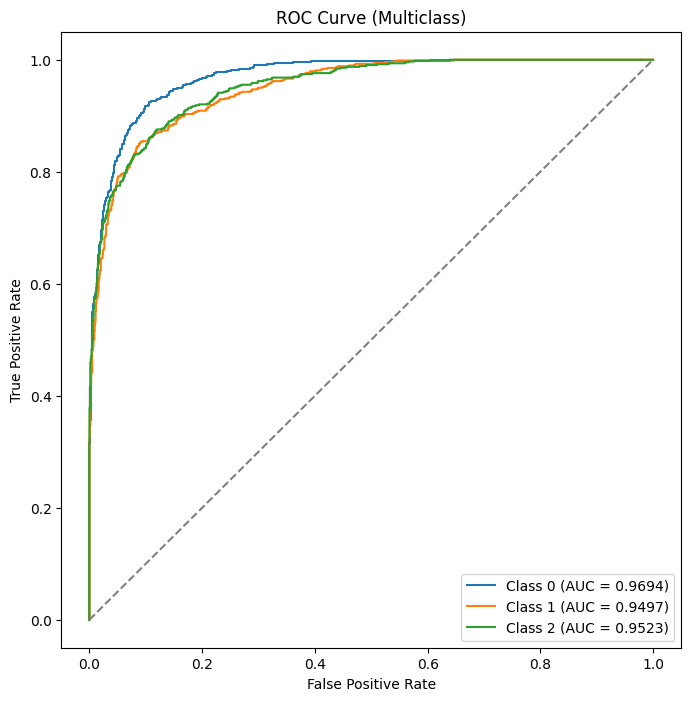

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=200)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_RF = rf_classifier.predict(X_test)


# Print classification report
report = classification_report(y_test, y_pred_RF, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4) * 100)

print("Train Accuracy:", accuracy_score(rf_classifier.predict(X_train), y_train).round(4) * 100)
print("Test Accuracy:", accuracy_score(y_pred_RF, y_test).round(4) * 100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_RF = rf_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_RF, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(rf_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_RF[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_RF[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 58.37   82.55     68.38   65900.00
1                 74.39   62.26     67.79   68100.00
2                 72.04   53.43     61.36   62700.00
accuracy          66.24   66.24     66.24      66.24
macro avg         68.27   66.08     65.84  196700.00
weighted avg      68.27   66.24     65.94  196700.00
Train Accuracy: 77.05
Test Accuracy: 66.24
Confusion Matrix:
[[544  57  58]
 [185 424  72]
 [203  89 335]]


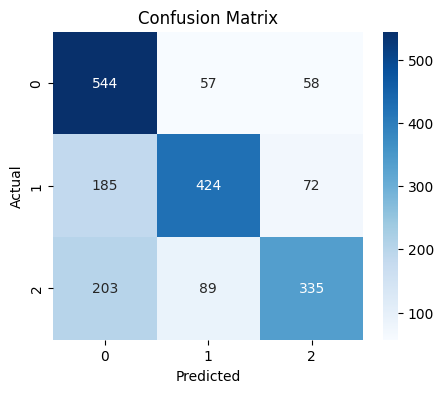

Multiclass AUC Score: 0.8427


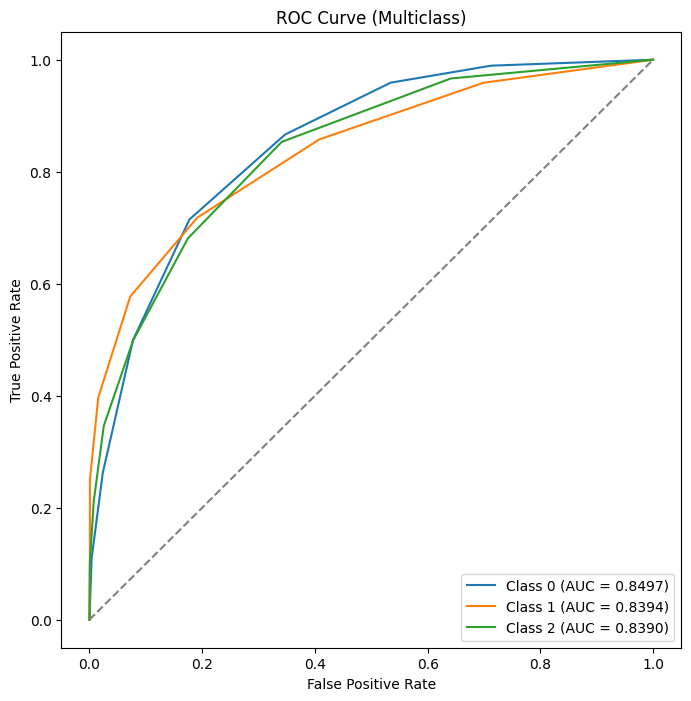

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_KNN = knn_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_KNN, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)
print("Train Accuracy:", accuracy_score(knn_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_KNN, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_KNN = knn_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_KNN, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(knn_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_KNN[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_KNN[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 77.32   83.31     80.20   65900.00
1                 81.08   72.98     76.82   68100.00
2                 75.47   77.51     76.48   62700.00
accuracy          77.89   77.89     77.89      77.89
macro avg         77.96   77.93     77.83  196700.00
weighted avg      78.03   77.89     77.84  196700.00
Train Accuracy: 98.583
Test Accuracy: 77.89
Confusion Matrix:
[[549  51  59]
 [ 85 497  99]
 [ 76  65 486]]


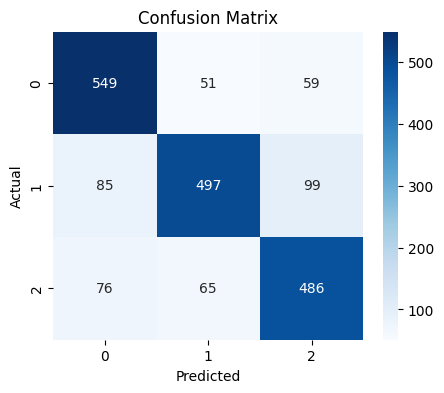

Multiclass AUC Score: 0.9211


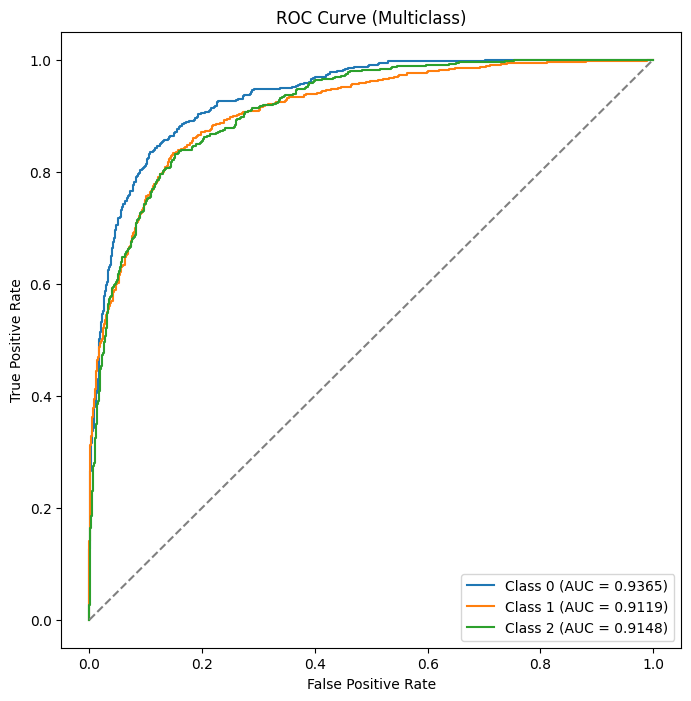

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the SVM classifier
svm_classifier = SVC(C=10, gamma='scale', kernel='rbf', probability=True)  # You can also try other kernels like 'rbf'

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_SVM = svm_classifier.predict(X_test)

# Compute and display classification report in decimals
report = classification_report(y_test, y_pred_SVM, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)

# Display train and test accuracy
print("Train Accuracy:", accuracy_score(svm_classifier.predict(X_train), y_train).round(5)*100)
print("Test Accuracy:", accuracy_score(y_pred_SVM, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_svm = svm_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_svm, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(svm_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_svm[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_svm[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                69.397  73.293    71.292   65900.000
1                69.612  65.932    67.722   68100.000
2                63.259  63.158    63.208   62700.000
accuracy         67.514  67.514    67.514      67.514
macro avg        67.423  67.461    67.407  196700.000
weighted avg     67.515  67.514    67.479  196700.000
Train Accuracy: 72.67
Test Accuracy: 67.51
Confusion Matrix:
[[483  82  94]
 [ 96 449 136]
 [117 114 396]]


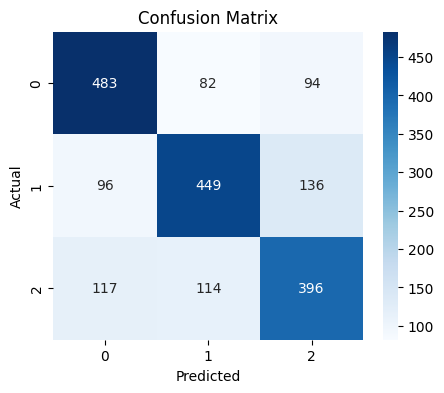

Multiclass AUC Score: 0.8392


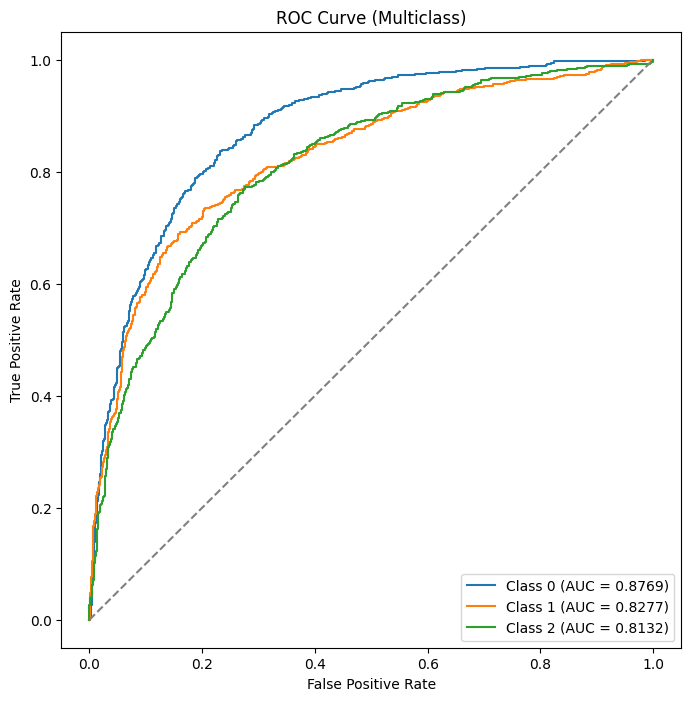

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(C=100, solver='newton-cg')

# Train the model
lr_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_LR = lr_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_LR, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(lr_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_LR, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)
print("Confusion Matrix:")
print(conf_matrix)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_lr = lr_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_lr, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(lr_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_lr[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_lr[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                66.802  75.114    70.714   65900.000
1                68.485  66.373    67.412   68100.000
2                68.198  61.563    64.711   62700.000
accuracy         67.768  67.768    67.768      67.768
macro avg        67.828  67.683    67.612  196700.000
weighted avg     67.829  67.768    67.657  196700.000
Train Accuracy: 80.99
Test Accuracy: 67.77
Confusion Matrix:
[[495  91  73]
 [122 452 107]
 [124 117 386]]


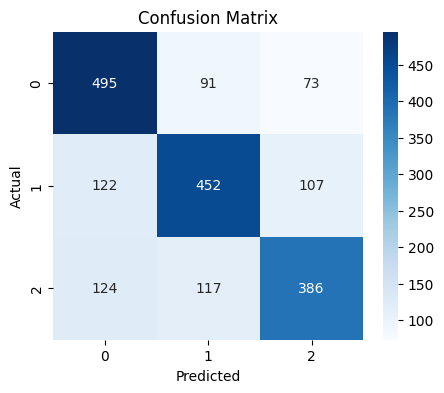

Multiclass AUC Score: 0.8392


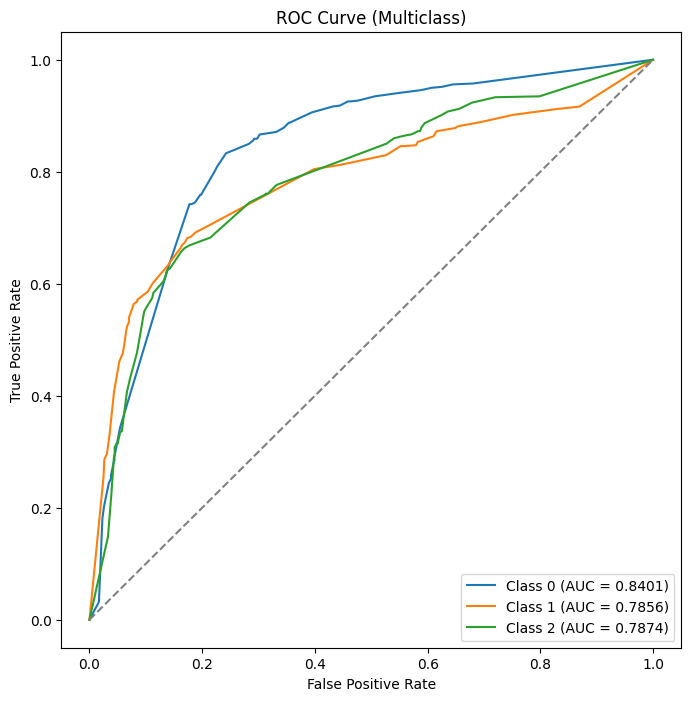

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=8)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_DT = dt_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_DT, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(dt_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_DT, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_dt = dt_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_lr, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(dt_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_dt[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_dt[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                70.231  73.748    71.947   65900.000
1                64.000  63.436    63.717   68100.000
2                61.833  59.171    60.473   62700.000
accuracy         65.531  65.531    65.531      65.531
macro avg        65.355  65.452    65.379  196700.000
weighted avg     65.397  65.531    65.440  196700.000
Train Accuracy: 76.68
Test Accuracy: 65.53


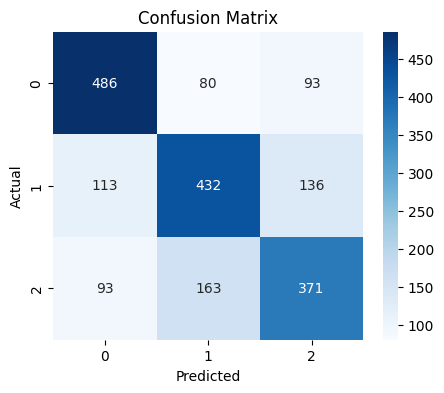

Multiclass AUC Score: 0.8244


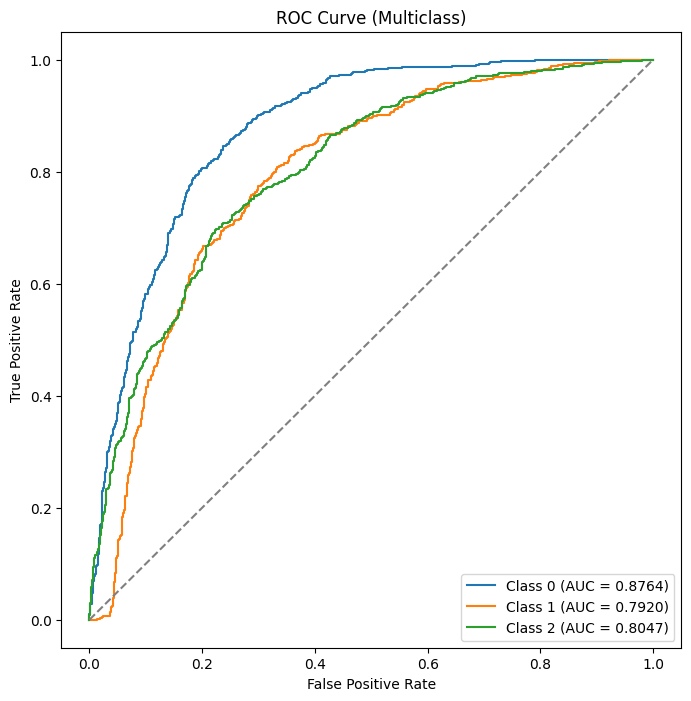

In [39]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)

# Train the model
ada_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_Ada = ada_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_Ada, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(ada_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_Ada, y_test).round(4)*100)

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_Ada)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=ada_classifier.classes_, yticklabels=ada_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_ada = ada_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_ada, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(ada_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_ada[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_ada[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [33]:
# End timing for the entire notebook
notebook_end_time = time.time()

In [34]:
# Compute execution time for counted cells
counted_execution_time = (notebook_end_time - notebook_start_time) - excluded_time
remaining_execution_time = notebook_end_time - remaining_start_time

# Display results
print(f"Total execution time (excluding skipped cell): {counted_execution_time:.2f} seconds")
print(f"Execution time for remaining cells: {remaining_execution_time:.2f} seconds")

Total execution time (excluding skipped cell): 2306.62 seconds
Execution time for remaining cells: 116.69 seconds


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Accuracy KNN: {:.5f}".format(accuracy_score(y_pred_KNN, y_test)))
print("Accuracy DT: {:.5f}".format(accuracy_score(y_pred_DT, y_test)))
print("Accuracy LR: {:.5f}".format(accuracy_score(y_pred_LR, y_test)))
# print("Accuracy NB: {:.2f}".format(accuracy_score(y_pred_NB, y_test)))
print("Accuracy SVM: {:.5f}".format(accuracy_score(y_pred_SVM, y_test)))
print("Accuracy RF: {:.5f}".format(accuracy_score(y_pred_RF, y_test)))
print("Accuracy ADA_B: {:.2f}".format(accuracy_score(y_pred_Ada, y_test)))
# print("Accuracy GB: {:.2f}".format(accuracy_score(y_pred_GB, y_test)))

Accuracy KNN: 0.66141
Accuracy DT: 0.66548
Accuracy LR: 0.67260
Accuracy SVM: 0.77885
Accuracy RF: 0.85104
Accuracy ADA_B: 0.66
